In [1]:
#!pip install researchpy

In [2]:
import numpy as np ## for mathematical application and data analysis
import pandas as pd ## for loading data and reading data as a data frame
import matplotlib.pyplot as plt ## for data visusalisation
%matplotlib inline
import seaborn as sns ## for data visualisation
import os #for loading data (csv files e.t.c)

from scipy.stats import chi2_contingency #Chi-square
import researchpy as rp #Chi-square
import statistics #Statistics
from statistics import mean, median, mode, stdev
pd.set_option('display.max_columns', None)

In [3]:
#df = pd.read_stata('DataDrive2030_PD_EXTERNAL.dta') 
df = pd.read_stata('DataDrive2030_PD_EXTERNAL_31AUG2022.dta')

In [4]:
df.head(1)

,child_id,data_year,data_source,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_score_item_1,child_score_item_2,child_score_item_3,child_score_item_4,child_domain_1,child_score_item_5,child_score_item_6,child_score_item_7,child_score_item_8,child_domain_2,child_score_item_9,child_score_item_10,child_score_item_11,child_score_item_12,child_score_item_13,child_domain_3,child_score_item_14,child_score_item_15,child_score_item_16,child_score_item_17,child_domain_4,child_score_item_18,child_score_item_19,child_score_item_20,child_score_item_21,child_score_item_22,child_score_item_23,child_domain_5,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_total_elom,child_total_elom_cuts,child_domain_1_cuts,child_domain_2_cuts,child_domain_3_cuts,child_domain_4_cuts,child_domain_5_cuts,child_gender,child_sample_wgt,child_dob,child_age_w2,child_date_w2,child_score_item_1_w2,child_score_item_2_w2,child_score_item_3_w2,child_score_item_4_w2,child_domain_1_w2,child_score_item_5_w2,child_score_item_6_w2,child_score_item_7_w2,child_score_item_8_w2,child_domain_2_w2,child_score_item_9_w2,child_score_item_10_w2,child_score_item_11_w2,child_score_item_12_w2,child_score_item_13_w2,child_domain_3_w2,child_score_item_14_w2,child_score_item_15_w2,child_score_item_16_w2,child_score_item_17_w2,child_domain_4_w2,child_score_item_18_w2,child_score_item_19_w2,child_score_item_20_w2,child_score_item_21_w2,child_score_item_22_w2,child_score_item_23_w2,child_domain_5_w2,child_total_elom_w2,child_height_w2,child_observe_attentive_w2,child_observe_concentrated_w2,child_observe_diligent_w2,child_observe_interested_w2,child_observe_total_w2,child_has_sibling,child_spectacles,child_conditions,child_age_group,child_zha,child_zha_w2,child_stunted,child_stunted_w2,PD_1_INT_total_elom_CHILD,PD_1_INT_domain_1_CHILD,PD_1_INT_domain_2_CHILD,PD_1_INT_domain_3_CHILD,PD_1_INT_domain_4_CHILD,PD_1_INT_domain_5_CHILD,PD_2_INT_CHILD,PD_4_INT_CHILD,PD_1_INT_total_elom_facility,PD_1_INT_domain_1_facility,PD_1_INT_domain_2_facility,PD_1_INT_domain_3_facility,PD_1_INT_domain_4_facility,PD_1_INT_domain_5_facility,PD_2_INT_pc_all_ontrack_facility,PD_3_INT_pc_ontrack_facility,PD_4_INT_composite_facility,PD_1_INT_total_elom_ward,PD_1_INT_domain_1_ward,PD_1_INT_domain_2_ward,PD_1_INT_domain_3_ward,PD_1_INT_domain_4_ward,PD_1_INT_domain_5_ward,PD_2_INT_pc_all_ontrack_ward,PD_3_INT_pc_ontrack_ward,PD_4_INT_composite_ward,PD_1_INT_total_elom_dc,PD_1_INT_domain_1_dc,PD_1_INT_domain_2_dc,PD_1_INT_domain_3_dc,PD_1_INT_domain_4_dc,PD_1_INT_domain_5_dc,PD_2_INT_pc_all_ontrack_dc,PD_3_INT_pc_ontrack_dc,PD_4_INT_composite_dc,PD_1_INT_total_elom_mn,PD_1_INT_domain_1_mn,PD_1_INT_domain_2_mn,PD_1_INT_domain_3_mn,PD_1_INT_domain_4_mn,PD_1_INT_domain_5_mn,PD_2_INT_pc_all_ontrack_mn,PD_3_INT_pc_ontrack_mn,PD_4_INT_composite_mn,PD_1_INT_total_facility,PD_1_INT_total_ward,PD_1_INT_total_mn,PD_1_INT_total_dc,id_mn_best,prov_best,id_dc_best,dc_best,mn_best,ward_best,id_enumerator,id_facility,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_environment_areas,pqa_environment_variety,pqa_environment_appropriate,pqa_environment_accessible,pqa_environment_open,pqa_environment_outdoor,pqa_score_environment,pqa_assessment_observation,pqa_assessment_systematic,pqa_score_assessment,pqa_relationships_peers,pqa_relationships_staff,pqa_relationships_acknowledge,pqa_relationships_discipline,pqa_score_relationships,pqa_curriculum_ncf,pqa_curriculum_plan,pqa_curriculum_balance,pqa_curriculum_numeracy,pqa_curriculum_literacy,pqa_score_curriculum,pqa_teaching_choice,pqa_teaching_engagement,pqa_teaching_participation,pqa_teaching_questions,pqa_teaching_support,pqa_score_teaching,pqa_class,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pr

In [5]:
df.shape

(11829, 1287)

In [6]:
new_df = df.copy()

In [7]:
'PD_3_INT_pc_ontrack_mn','PD_3_INT_pc_ontrack_dc','PD_3_INT_pc_ontrack_ward','PD_3_INT_pc_ontrack_facility'

('PD_3_INT_pc_ontrack_mn',
 'PD_3_INT_pc_ontrack_dc',
 'PD_3_INT_pc_ontrack_ward',
 'PD_3_INT_pc_ontrack_facility')

In [8]:
#PD_1_INT_total_elom_CHILD	PD_1_INT_domain_1_CHILD	PD_1_INT_domain_2_CHILD	PD_1_INT_domain_3_CHILD	PD_1_INT_domain_4_CHILD	PD_1_INT_domain_5_CHILD	
#PD_2_INT_CHILD	PD_4_INT_CHILD	PD_1_INT_total_elom_facility	PD_1_INT_domain_1_facility	PD_1_INT_domain_2_facility	PD_1_INT_domain_3_facility	PD_1_INT_domain_4_facility	PD_1_INT_domain_5_facility	
#PD_2_INT_pc_all_ontrack_facility	PD_3_INT_pc_ontrack_facility	PD_4_INT_composite_facility	
#PD_1_INT_total_elom_ward	PD_1_INT_domain_1_ward	PD_1_INT_domain_2_ward	PD_1_INT_domain_3_ward	PD_1_INT_domain_4_ward	PD_1_INT_domain_5_ward	
#PD_2_INT_pc_all_ontrack_ward	PD_3_INT_pc_ontrack_ward	PD_4_INT_composite_ward	
#PD_1_INT_total_elom_dc	PD_1_INT_domain_1_dc	PD_1_INT_domain_2_dc	PD_1_INT_domain_3_dc	PD_1_INT_domain_4_dc	PD_1_INT_domain_5_dc	
#PD_2_INT_pc_all_ontrack_dc	PD_3_INT_pc_ontrack_dc	PD_4_INT_composite_dc	
#PD_1_INT_total_elom_mn	PD_1_INT_domain_1_mn	PD_1_INT_domain_2_mn	PD_1_INT_domain_3_mn	PD_1_INT_domain_4_mn	PD_1_INT_domain_5_mn	
#PD_2_INT_pc_all_ontrack_mn	PD_3_INT_pc_ontrack_mn	PD_4_INT_composite_mn	
#PD_1_INT_total_facility	PD_1_INT_total_ward	PD_1_INT_total_mn	PD_1_INT_total_dc

### ELOM_CHILD

In [9]:
Elom_child = new_df[['PD_1_INT_total_elom_CHILD','PD_1_INT_domain_1_CHILD','PD_1_INT_domain_2_CHILD','PD_1_INT_domain_3_CHILD','PD_1_INT_domain_4_CHILD','PD_1_INT_domain_5_CHILD']]
Elom_child.head()

,PD_1_INT_total_elom_CHILD,PD_1_INT_domain_1_CHILD,PD_1_INT_domain_2_CHILD,PD_1_INT_domain_3_CHILD,PD_1_INT_domain_4_CHILD,PD_1_INT_domain_5_CHILD
0,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
1,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
2,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
3,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
4,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant


In [10]:
#Check for null values
Elom_child.isnull().sum()

PD_1_INT_total_elom_CHILD    0
PD_1_INT_domain_1_CHILD      0
PD_1_INT_domain_2_CHILD      0
PD_1_INT_domain_3_CHILD      0
PD_1_INT_domain_4_CHILD      0
PD_1_INT_domain_5_CHILD      0
dtype: int64

In [11]:
Elom_child.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11829 entries, 0 to 11828
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   PD_1_INT_total_elom_CHILD  11829 non-null  category
 1   PD_1_INT_domain_1_CHILD    11829 non-null  category
 2   PD_1_INT_domain_2_CHILD    11829 non-null  category
 3   PD_1_INT_domain_3_CHILD    11829 non-null  category
 4   PD_1_INT_domain_4_CHILD    11829 non-null  category
 5   PD_1_INT_domain_5_CHILD    11829 non-null  category
dtypes: category(6)
memory usage: 162.5 KB


In [12]:
Elom_child['PD_1_INT_total_elom_CHILD'].value_counts()

Non-deviant         11666
Positive deviant      163
Name: PD_1_INT_total_elom_CHILD, dtype: int64

In [13]:
Elom_child['PD_1_INT_domain_1_CHILD'].value_counts()

Non-deviant         11487
Positive deviant      342
Name: PD_1_INT_domain_1_CHILD, dtype: int64

In [14]:
Elom_child['PD_1_INT_domain_2_CHILD'].value_counts()

Non-deviant         11630
Positive deviant      199
Name: PD_1_INT_domain_2_CHILD, dtype: int64

In [15]:
Elom_child['PD_1_INT_domain_3_CHILD'].value_counts()

Non-deviant         11502
Positive deviant      327
Name: PD_1_INT_domain_3_CHILD, dtype: int64

In [16]:
Elom_child['PD_1_INT_domain_4_CHILD'].value_counts()

Non-deviant         11446
Positive deviant      383
Name: PD_1_INT_domain_4_CHILD, dtype: int64

In [17]:
Elom_child['PD_1_INT_domain_5_CHILD'].value_counts()

Non-deviant         11749
Positive deviant       80
Name: PD_1_INT_domain_5_CHILD, dtype: int64

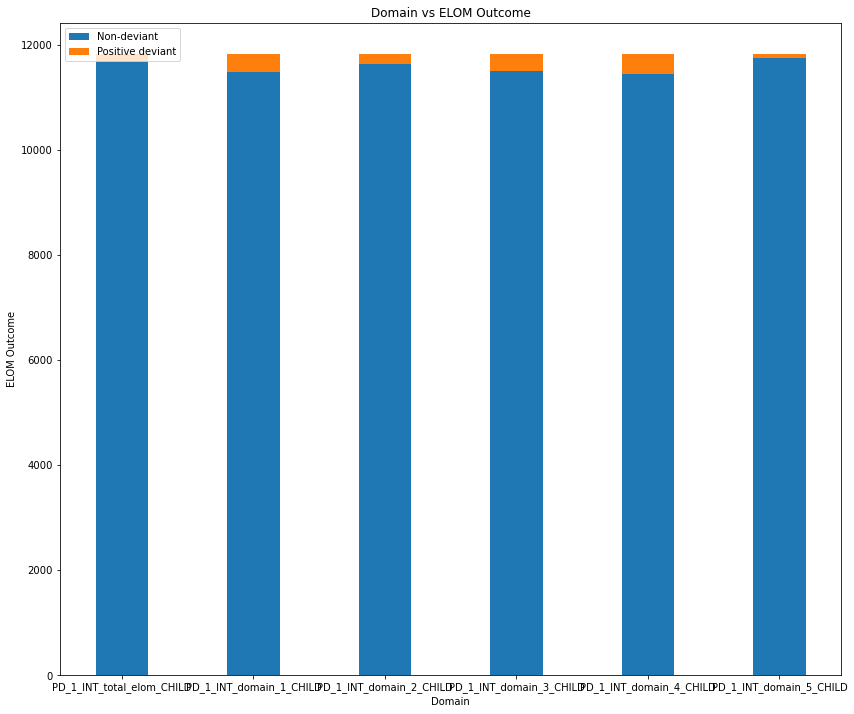

In [85]:
plt.figure(figsize=(14,12))
w = 0.4
x = ['PD_1_INT_total_elom_CHILD','PD_1_INT_domain_1_CHILD','PD_1_INT_domain_2_CHILD','PD_1_INT_domain_3_CHILD','PD_1_INT_domain_4_CHILD','PD_1_INT_domain_5_CHILD']
Non_deviant = [ 11666,11487,11630,11502,11446,11749]
Positive_deviant =[163,342,199,327,383,80]

bar1 = np.arange(len(x))
plt.bar(x,Non_deviant,w,label ='Non-deviant')
plt.bar(x,Positive_deviant,w, bottom = Non_deviant, label = 'Positive deviant')

plt.xlabel('Domain')
plt.ylabel('ELOM Outcome')
plt.title('Domain vs ELOM Outcome')
plt.legend()
plt.show()

In [18]:
def my_recode(column):
    #df = Obs_df
    if column == "Non-deviant":
        return 0
    else: 
        column == "Positive deviant"
        return 1

In [19]:
#Categorical variables
#recode and transform to numerical variables
Elom_child['PD_1_INT_total_elom_CHILDc'] = Elom_child['PD_1_INT_total_elom_CHILD'].apply(my_recode)
Elom_child['PD_1_INT_domain_1_CHILDc'] = Elom_child['PD_1_INT_domain_1_CHILD'].apply(my_recode)
Elom_child['PD_1_INT_domain_2_CHILDc'] = Elom_child['PD_1_INT_domain_2_CHILD'].apply(my_recode)
Elom_child['PD_1_INT_domain_3_CHILDc'] = Elom_child['PD_1_INT_domain_3_CHILD'].apply(my_recode)
Elom_child['PD_1_INT_domain_4_CHILDc'] = Elom_child['PD_1_INT_domain_4_CHILD'].apply(my_recode)
Elom_child['PD_1_INT_domain_5_CHILDc'] = Elom_child['PD_1_INT_domain_5_CHILD'].apply(my_recode)

C:\Users\karas\AppData\Local\Temp/ipykernel_25180/2440704025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Elom_child['PD_1_INT_total_elom_CHILDc'] = Elom_child['PD_1_INT_total_elom_CHILD'].apply(my_recode)
C:\Users\karas\AppData\Local\Temp/ipykernel_25180/2440704025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Elom_child['PD_1_INT_domain_1_CHILDc'] = Elom_child['PD_1_INT_domain_1_CHILD'].apply(my_recode)
C:\Users\karas\AppData\Local\Temp/ipykernel_25180/2440704025.py:5: SettingWithCopyWarning:

In [20]:
Elom_child.columns

Index(['PD_1_INT_total_elom_CHILD', 'PD_1_INT_domain_1_CHILD',
       'PD_1_INT_domain_2_CHILD', 'PD_1_INT_domain_3_CHILD',
       'PD_1_INT_domain_4_CHILD', 'PD_1_INT_domain_5_CHILD',
       'PD_1_INT_total_elom_CHILDc', 'PD_1_INT_domain_1_CHILDc',
       'PD_1_INT_domain_2_CHILDc', 'PD_1_INT_domain_3_CHILDc',
       'PD_1_INT_domain_4_CHILDc', 'PD_1_INT_domain_5_CHILDc'],
      dtype='object')

In [21]:
Elom_CHILDc = Elom_child.drop(['PD_1_INT_total_elom_CHILD','PD_1_INT_domain_1_CHILD','PD_1_INT_domain_2_CHILD', 'PD_1_INT_domain_3_CHILD','PD_1_INT_domain_4_CHILD', 'PD_1_INT_domain_5_CHILD'], axis = 1)
Elom_CHILDc.head()

,PD_1_INT_total_elom_CHILDc,PD_1_INT_domain_1_CHILDc,PD_1_INT_domain_2_CHILDc,PD_1_INT_domain_3_CHILDc,PD_1_INT_domain_4_CHILDc,PD_1_INT_domain_5_CHILDc
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [22]:
#Transform variables to numerical 
Elom_CHILDc['PD_1_INT_total_elom_CHILDc'] = pd.factorize(Elom_CHILDc['PD_1_INT_total_elom_CHILDc'])[0]
Elom_CHILDc['PD_1_INT_domain_1_CHILDc'] = pd.factorize(Elom_CHILDc['PD_1_INT_domain_1_CHILDc'])[0]
Elom_CHILDc['PD_1_INT_domain_2_CHILDc'] = pd.factorize(Elom_CHILDc['PD_1_INT_domain_2_CHILDc'])[0]
Elom_CHILDc['PD_1_INT_domain_3_CHILDc'] = pd.factorize(Elom_CHILDc['PD_1_INT_domain_3_CHILDc'])[0]
Elom_CHILDc['PD_1_INT_domain_4_CHILDc'] = pd.factorize(Elom_CHILDc['PD_1_INT_domain_4_CHILDc'])[0]
Elom_CHILDc['PD_1_INT_domain_5_CHILDc'] = pd.factorize(Elom_CHILDc['PD_1_INT_domain_5_CHILDc'])[0]


In [23]:
Elom_CHILDc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11829 entries, 0 to 11828
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   PD_1_INT_total_elom_CHILDc  11829 non-null  int64
 1   PD_1_INT_domain_1_CHILDc    11829 non-null  int64
 2   PD_1_INT_domain_2_CHILDc    11829 non-null  int64
 3   PD_1_INT_domain_3_CHILDc    11829 non-null  int64
 4   PD_1_INT_domain_4_CHILDc    11829 non-null  int64
 5   PD_1_INT_domain_5_CHILDc    11829 non-null  int64
dtypes: int64(6)
memory usage: 646.9 KB


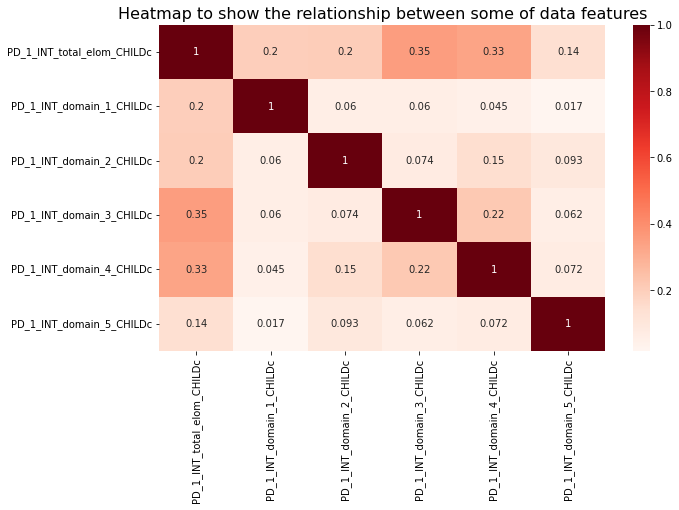

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(Elom_CHILDc.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap to show the relationship between some of data features', fontsize=16)
plt.show()

PD_1_INT_domain_3_CHILD **Emergent Numeracy and Mathematics** & PD_1_INT_domain_4_CHILD **Cognition and Executive Functionseem** to be strongly correlated to the PD_1_INT_total_elom_CHILD

Why these two domains?
-domain_3 was expected as the literature has documented it's impact on children thriving

### Lets confirm the results of heatmap using Chi-square



In [25]:
#Performing Chi-square tests to check the association between total ELOM  and DOMAIN 3 as with regards to CHILD
ctab, chitest, expected = rp.crosstab(Elom_child['PD_1_INT_total_elom_CHILD'],Elom_child['PD_1_INT_domain_3_CHILD'],
                                     margins = False, test = "chi-square", expected_freqs = True)

print(ctab)
print(chitest)
print(expected)

                          PD_1_INT_domain_3_CHILD                 
PD_1_INT_domain_3_CHILD               Non-deviant Positive deviant
PD_1_INT_total_elom_CHILD                                         
Non-deviant                                 11423              243
Positive deviant                               79               84
                Chi-square test    results
0  Pearson Chi-square ( 1.0) =   1462.4551
1                    p-value =      0.0000
2               Cramer's phi =      0.3516
                          PD_1_INT_domain_3_CHILD                 
PD_1_INT_domain_3_CHILD               Non-deviant Positive deviant
PD_1_INT_total_elom_CHILD                                         
Non-deviant                           11343.50596        322.49404
Positive deviant                        158.49404          4.50596


In [26]:
print(f""" Only few children {(84/Elom_child.shape[0])*100}% showed a positive deviance""")

print(f""" The results shows that there is a very strong association between domain_3 and the overall ELOM (p=0.0000,Cramer's phi = 0.3516 )""")

print(f""" This was also confirmed by the results of the heatmap""")

 Only few children 0.7101191985797616% showed a positive deviance
 The results shows that there is a very strong association between domain_3 and the overall ELOM (p=0.0000,Cramer's phi = 0.3516 )
 This was also confirmed by the results of the heatmap


In [27]:
#Performing Chi-square tests to check the association between total ELOM  and DOMAIN 4 as with regards to CHILD
ctab, chitest, expected = rp.crosstab(Elom_child['PD_1_INT_total_elom_CHILD'],Elom_child['PD_1_INT_domain_4_CHILD'],
                                     margins = False, test = "chi-square", expected_freqs = True)

print(ctab)
print(chitest)
print(expected)

                          PD_1_INT_domain_4_CHILD                 
PD_1_INT_domain_4_CHILD               Non-deviant Positive deviant
PD_1_INT_total_elom_CHILD                                         
Non-deviant                                 11370              296
Positive deviant                               76               87
                Chi-square test    results
0  Pearson Chi-square ( 1.0) =   1326.0625
1                    p-value =      0.0000
2               Cramer's phi =      0.3348
                          PD_1_INT_domain_4_CHILD                 
PD_1_INT_domain_4_CHILD               Non-deviant Positive deviant
PD_1_INT_total_elom_CHILD                                         
Non-deviant                          11288.277623       377.722377
Positive deviant                       157.722377         5.277623


In [28]:
print(f""" Only few children {(87/Elom_child.shape[0])*100}% showed a positive deviance""")

print(f""" The results shows that there is a very strong association between domain_4 and the overall ELOM (p=0.0000,Cramer's phi = 0.3348 )""")

print(f""" This was also confirmed by the results of the heatmap""")

 Only few children 0.7354805985290388% showed a positive deviance
 The results shows that there is a very strong association between domain_4 and the overall ELOM (p=0.0000,Cramer's phi = 0.3348 )
 This was also confirmed by the results of the heatmap


## Composite scores....PD_4_INT

In [29]:
PD4 = new_df[['PD_4_INT_CHILD','PD_4_INT_composite_ward','PD_4_INT_composite_facility','PD_4_INT_composite_dc','PD_4_INT_composite_mn']]
PD4.head()

,PD_4_INT_CHILD,PD_4_INT_composite_ward,PD_4_INT_composite_facility,PD_4_INT_composite_dc,PD_4_INT_composite_mn
0,Non-deviant,Non-deviant,Non-deviant,Positive deviant,Non-deviant
1,Non-deviant,Non-deviant,Non-deviant,Positive deviant,Non-deviant
2,Non-deviant,Non-deviant,Non-deviant,Positive deviant,Non-deviant
3,Non-deviant,Non-deviant,Non-deviant,Positive deviant,Non-deviant
4,Non-deviant,Non-deviant,Non-deviant,Positive deviant,Non-deviant


In [30]:
PD4.isnull().sum()

PD_4_INT_CHILD                 0
PD_4_INT_composite_ward        0
PD_4_INT_composite_facility    0
PD_4_INT_composite_dc          0
PD_4_INT_composite_mn          0
dtype: int64

In [31]:
PD4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11829 entries, 0 to 11828
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   PD_4_INT_CHILD               11829 non-null  category
 1   PD_4_INT_composite_ward      11829 non-null  category
 2   PD_4_INT_composite_facility  11829 non-null  category
 3   PD_4_INT_composite_dc        11829 non-null  category
 4   PD_4_INT_composite_mn        11829 non-null  category
dtypes: category(5)
memory usage: 150.8 KB


In [32]:
PD4['PD_4_INT_CHILD'].value_counts()

Non-deviant         11626
Positive deviant      203
Name: PD_4_INT_CHILD, dtype: int64

In [33]:
PD4['PD_4_INT_composite_mn'].value_counts()  

Non-deviant         11429
Positive deviant      400
Name: PD_4_INT_composite_mn, dtype: int64

In [34]:
#Convert categorical variables to numerical
PD4['PD_4_INT_CHILDc'] = PD4['PD_4_INT_CHILD'].apply(my_recode)
PD4['PD_4_INT_composite_wardc'] = PD4['PD_4_INT_composite_ward'].apply(my_recode)
PD4['PD_4_INT_composite_facilityc'] = PD4['PD_4_INT_composite_facility'].apply(my_recode)
PD4['PD_4_INT_composite_dcc'] = PD4['PD_4_INT_composite_dc'].apply(my_recode)
PD4['PD_4_INT_composite_mnc'] = PD4['PD_4_INT_composite_mn'].apply(my_recode)


C:\Users\karas\AppData\Local\Temp/ipykernel_25180/1649512466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PD4['PD_4_INT_CHILDc'] = PD4['PD_4_INT_CHILD'].apply(my_recode)
C:\Users\karas\AppData\Local\Temp/ipykernel_25180/1649512466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PD4['PD_4_INT_composite_wardc'] = PD4['PD_4_INT_composite_ward'].apply(my_recode)
C:\Users\karas\AppData\Local\Temp/ipykernel_25180/1649512466.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [35]:
PD4_df = PD4.drop(['PD_4_INT_CHILD','PD_4_INT_composite_ward','PD_4_INT_composite_facility','PD_4_INT_composite_dc','PD_4_INT_composite_mn'], axis =1)
PD4_df.head()

,PD_4_INT_CHILDc,PD_4_INT_composite_wardc,PD_4_INT_composite_facilityc,PD_4_INT_composite_dcc,PD_4_INT_composite_mnc
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [36]:
#Convert categorical variables to numerical variables
PD4_df['PD_4_INT_CHILDc'] = pd.factorize(PD4_df['PD_4_INT_CHILDc'])[0]
PD4_df['PD_4_INT_composite_wardc'] = pd.factorize(PD4_df['PD_4_INT_composite_wardc'])[0]
PD4_df['PD_4_INT_composite_facilityc'] = pd.factorize(PD4_df['PD_4_INT_composite_facilityc'])[0]
PD4_df['PD_4_INT_composite_dcc'] = pd.factorize(PD4_df['PD_4_INT_composite_dcc'])[0]
PD4_df['PD_4_INT_composite_mnc'] = pd.factorize(PD4_df['PD_4_INT_composite_mnc'])[0]


In [37]:
PD4_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11829 entries, 0 to 11828
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   PD_4_INT_CHILDc               11829 non-null  int64
 1   PD_4_INT_composite_wardc      11829 non-null  int64
 2   PD_4_INT_composite_facilityc  11829 non-null  int64
 3   PD_4_INT_composite_dcc        11829 non-null  int64
 4   PD_4_INT_composite_mnc        11829 non-null  int64
dtypes: int64(5)
memory usage: 554.5 KB


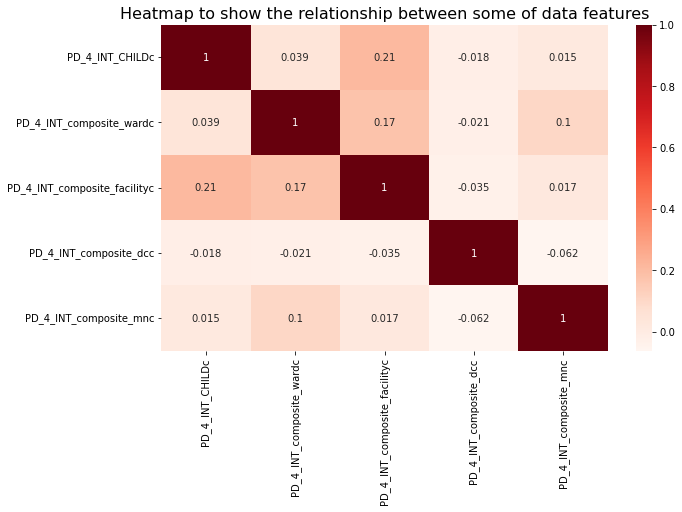

In [38]:
#Correlation of the variables
plt.figure(figsize=(10,6))
sns.heatmap(PD4_df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap to show the relationship between some of data features', fontsize=16)
plt.show()

There is a notable relationship (R^2 =0.21) between **CHILD** and **facility**.......This perhaps tells us that the nature of the facilities contribute to some extent to the overall outcomes of children progress in their development

### Assess facility vs domains

In [39]:
FD_df = new_df[['PD_1_INT_total_elom_facility','PD_1_INT_domain_1_facility','PD_1_INT_domain_2_facility','PD_1_INT_domain_3_facility','PD_1_INT_domain_4_facility','PD_1_INT_domain_5_facility']]
FD_df.head()

,PD_1_INT_total_elom_facility,PD_1_INT_domain_1_facility,PD_1_INT_domain_2_facility,PD_1_INT_domain_3_facility,PD_1_INT_domain_4_facility,PD_1_INT_domain_5_facility
0,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
1,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
2,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
3,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
4,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant


In [40]:
FD_df.isnull().sum()

PD_1_INT_total_elom_facility    0
PD_1_INT_domain_1_facility      0
PD_1_INT_domain_2_facility      0
PD_1_INT_domain_3_facility      0
PD_1_INT_domain_4_facility      0
PD_1_INT_domain_5_facility      0
dtype: int64

In [41]:
FD_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11829 entries, 0 to 11828
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   PD_1_INT_total_elom_facility  11829 non-null  category
 1   PD_1_INT_domain_1_facility    11829 non-null  category
 2   PD_1_INT_domain_2_facility    11829 non-null  category
 3   PD_1_INT_domain_3_facility    11829 non-null  category
 4   PD_1_INT_domain_4_facility    11829 non-null  category
 5   PD_1_INT_domain_5_facility    11829 non-null  category
dtypes: category(6)
memory usage: 162.5 KB


In [42]:
#Convert categorical variables to numerical
FD_df['PD_1_INT_total_elom_facilityx'] = FD_df['PD_1_INT_total_elom_facility'].apply(my_recode)
FD_df['PD_1_INT_domain_1_facilityx'] = FD_df['PD_1_INT_domain_1_facility'].apply(my_recode)
FD_df['PD_1_INT_domain_2_facilityx'] = FD_df['PD_1_INT_domain_2_facility'].apply(my_recode)
FD_df['PD_1_INT_domain_3_facilityx'] = FD_df['PD_1_INT_domain_3_facility'].apply(my_recode)
FD_df['PD_1_INT_domain_4_facilityx'] = FD_df['PD_1_INT_domain_4_facility'].apply(my_recode)
FD_df['PD_1_INT_domain_5_facilityx'] = FD_df['PD_1_INT_domain_5_facility'].apply(my_recode)

C:\Users\karas\AppData\Local\Temp/ipykernel_25180/946570214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FD_df['PD_1_INT_total_elom_facilityx'] = FD_df['PD_1_INT_total_elom_facility'].apply(my_recode)
C:\Users\karas\AppData\Local\Temp/ipykernel_25180/946570214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FD_df['PD_1_INT_domain_1_facilityx'] = FD_df['PD_1_INT_domain_1_facility'].apply(my_recode)
C:\Users\karas\AppData\Local\Temp/ipykernel_25180/946570214.py:4: SettingWithCopyWarning: 
A value i

In [43]:
FD_new = FD_df.drop(['PD_1_INT_total_elom_facility','PD_1_INT_domain_1_facility','PD_1_INT_domain_2_facility','PD_1_INT_domain_3_facility','PD_1_INT_domain_4_facility','PD_1_INT_domain_5_facility'], axis =1)
FD_new.head()

,PD_1_INT_total_elom_facilityx,PD_1_INT_domain_1_facilityx,PD_1_INT_domain_2_facilityx,PD_1_INT_domain_3_facilityx,PD_1_INT_domain_4_facilityx,PD_1_INT_domain_5_facilityx
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [44]:
FD_new.columns

Index(['PD_1_INT_total_elom_facilityx', 'PD_1_INT_domain_1_facilityx',
       'PD_1_INT_domain_2_facilityx', 'PD_1_INT_domain_3_facilityx',
       'PD_1_INT_domain_4_facilityx', 'PD_1_INT_domain_5_facilityx'],
      dtype='object')

In [45]:
FD_new['PD_1_INT_total_elom_facilityx']= pd.factorize(FD_new['PD_1_INT_total_elom_facilityx'])[0]
FD_new['PD_1_INT_domain_1_facilityx']= pd.factorize(FD_new['PD_1_INT_domain_1_facilityx'])[0]
FD_new['PD_1_INT_domain_2_facilityx']= pd.factorize(FD_new['PD_1_INT_domain_2_facilityx'])[0]
FD_new['PD_1_INT_domain_3_facilityx']= pd.factorize(FD_new['PD_1_INT_domain_3_facilityx'])[0]
FD_new['PD_1_INT_domain_4_facilityx']= pd.factorize(FD_new['PD_1_INT_domain_4_facilityx'])[0]
FD_new['PD_1_INT_domain_5_facilityx']= pd.factorize(FD_new['PD_1_INT_domain_5_facilityx'])[0]


In [46]:
FD_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11829 entries, 0 to 11828
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   PD_1_INT_total_elom_facilityx  11829 non-null  int64
 1   PD_1_INT_domain_1_facilityx    11829 non-null  int64
 2   PD_1_INT_domain_2_facilityx    11829 non-null  int64
 3   PD_1_INT_domain_3_facilityx    11829 non-null  int64
 4   PD_1_INT_domain_4_facilityx    11829 non-null  int64
 5   PD_1_INT_domain_5_facilityx    11829 non-null  int64
dtypes: int64(6)
memory usage: 646.9 KB


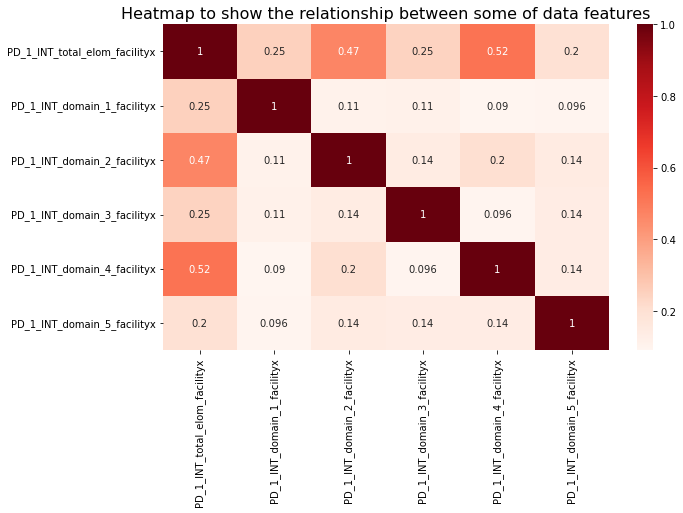

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(FD_new.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap to show the relationship between some of data features', fontsize=16)
plt.show()

We can see from the heatmap that domains 2 **(Fine Motor Coordination: Category)** & 4 **(Cognition and EF: Category)** are strongly correlated to the facility

### Notes

Around 8 percent of ECD facilities lack proper infrastructure (Martin et al, 2014)|: **Mbarathi et al 016**

The national audit on ECD centres (2014) show most facilities remain unregistered with the
Department of Social Development (DSD) because they fail to meet the standards presented
by the department. For an ECD to be registered, the infrastructural conditions should be according to the set DSD requirements

**Lets confirm the association of domains 2 & 4 with total ELOM using Chi-square test**

In [48]:
#Performing Chi-square tests to check the association between total ELOM  and DOMAIN 2 as with regards to facilities
ctab, chitest, expected = rp.crosstab(FD_df['PD_1_INT_total_elom_facility'],FD_df['PD_1_INT_domain_2_facility'],
                                     margins = False, test = "chi-square", expected_freqs = True)

print(ctab)
print(chitest)
print(expected)

                             PD_1_INT_domain_2_facility                 
PD_1_INT_domain_2_facility                  Non-deviant Positive deviant
PD_1_INT_total_elom_facility                                            
Non-deviant                                       11496              145
Positive deviant                                     85              103
                Chi-square test    results
0  Pearson Chi-square ( 1.0) =   2583.9358
1                    p-value =      0.0000
2               Cramer's phi =      0.4674
                             PD_1_INT_domain_2_facility                 
PD_1_INT_domain_2_facility                  Non-deviant Positive deviant
PD_1_INT_total_elom_facility                                            
Non-deviant                                  11396.9415         244.0585
Positive deviant                               184.0585           3.9415


What was expected was a low (3.9415) positive deviance with regards to facilities and the overall ELOM under domain 2. However, a couple of learners (103) showing positive deviance were observed.<br>

There is a very strong association between facility and the overall ELOM (p=0.0000, Cramer's phi = 0.4674) under domain 2 (Fine Motor Coordination: Category). **This could indicate how the nature of the facility positively stimulate the zeal for learning in children**. My assumptions are that, Well <br>taken facilities meeting golden standards have access to funding for sustainability and maintainance <br>

In South Africa, reports about facilities are as follows :<br>

**Registration status with the Department of Social Development** <br>

>**40%** are fully or conditionally registered as a partial care facility, an early learning programme or both <br>
>**16%** are in the process of registering <br)
>**42%** of programmes are not registered <br>
>**33%** receive a subsidy from DSD 

Positive deviance is when positive impact and/or success or outcomes are achieved without additional support

>They’re **outliers;** their outcomes deviate significantly from their peers.<br>
>The outcomes they achieve are positive; students demonstrated dramatically improved educational outcomes.<br>
>Finally, and most importantly, they achieved these outcomes **without receiving any additional support or resources**.

### Additional notes on positive deviants

Positive Deviant inquiry identifies individuals who have solved problems that others, who have access to the same resources in <br> the same context, have not been able to solve (Sparks, 2004).<br>

A key insight of Positive Deviance is that additional resources aren’t always necessary. By discovering what’s already working,<br> within the limits of existing resources, schools can identify solutions that don’t require additional resources.<br>

**The Six Ds of Positive Deviance**<br>

**DEFINE** <br>
What’s the problem? What are the causes and the related community behavioral norms?<br>
What would success look look like, described as a behavioral outcome in teachers and students?<br>

### A staggering 65% of children attending an ELP in South Africa fail to Thrive by Five.¶

**DETERMINE**<br>
Are there any teachers in the community who already exhibit the desired behavior or outcome?<br>

> *Are there any children attending an ELP who are Thriving by five?*

**DISCOVER** <br>
What are the unique practices or behaviors that enable positive deviants to outperform others in their community? <br>

> *What are the unique behaviours and characteristics of these children?*

**DESIGN** <br>
Design and implement an intervention that enables others in the community to experience and practice new behaviors (focus on <br>doing rather than transfer of knowledge).<br>


**DISCERN** <br>
What is the effectiveness of the intervention? <br>

**DISSEMINATE** <br>
Make the intervention accessible to a wider constituency (replication/scaling up).<br>

https://www.linkedin.com/pulse/using-positive-deviance-improve-education-shawn-edmondson

Check (Singhal, 2013) positive deviance

In [49]:
#Performing Chi-square tests to check the association between total ELOM  and DOMAIN 4 as with regards to facilities
ctab, chitest, expected = rp.crosstab(FD_df['PD_1_INT_total_elom_facility'],FD_df['PD_1_INT_domain_4_facility'],
                                     margins = False, test = "chi-square", expected_freqs = True)

print(ctab)
print(chitest)
print(expected)

                             PD_1_INT_domain_4_facility                 
PD_1_INT_domain_4_facility                  Non-deviant Positive deviant
PD_1_INT_total_elom_facility                                            
Non-deviant                                       11485              156
Positive deviant                                     68              120
                Chi-square test    results
0  Pearson Chi-square ( 1.0) =   3170.3641
1                    p-value =      0.0000
2               Cramer's phi =      0.5177
                             PD_1_INT_domain_4_facility                 
PD_1_INT_domain_4_facility                  Non-deviant Positive deviant
PD_1_INT_total_elom_facility                                            
Non-deviant                                11369.386508       271.613492
Positive deviant                             183.613492         4.386508


What was expected was a low (4.386508) positive deviance with regards to facilities and the overall ELOM under domain 4. However, a couple of learners (120) showing positive deviance were observed.

There is a very strong association between facility and the overall ELOM (p=0.0000, **Cramer's phi = 0.5177**) under domain 4 **(Cognition and EF: Category)**.

### On track

In [50]:
On_track = new_df[['PD_3_INT_pc_ontrack_mn','PD_3_INT_pc_ontrack_dc','PD_3_INT_pc_ontrack_ward','PD_3_INT_pc_ontrack_facility']]
On_track.head()

,PD_3_INT_pc_ontrack_mn,PD_3_INT_pc_ontrack_dc,PD_3_INT_pc_ontrack_ward,PD_3_INT_pc_ontrack_facility
0,Non-deviant,Non-deviant,Non-deviant,Non-deviant
1,Non-deviant,Non-deviant,Non-deviant,Non-deviant
2,Non-deviant,Non-deviant,Non-deviant,Non-deviant
3,Non-deviant,Non-deviant,Non-deviant,Non-deviant
4,Non-deviant,Non-deviant,Non-deviant,Non-deviant


In [67]:
On_track['PD_3_INT_pc_ontrack_mn'].value_counts()

Non-deviant         11538
Positive deviant      291
Name: PD_3_INT_pc_ontrack_mn, dtype: int64

In [68]:
On_track['PD_3_INT_pc_ontrack_dc'].value_counts()

Non-deviant         11740
Positive deviant       89
Name: PD_3_INT_pc_ontrack_dc, dtype: int64

In [69]:
On_track['PD_3_INT_pc_ontrack_ward'].value_counts()

Non-deviant         11638
Positive deviant      191
Name: PD_3_INT_pc_ontrack_ward, dtype: int64

In [70]:
On_track['PD_3_INT_pc_ontrack_facility'].value_counts()

Non-deviant         11586
Positive deviant      243
Name: PD_3_INT_pc_ontrack_facility, dtype: int64

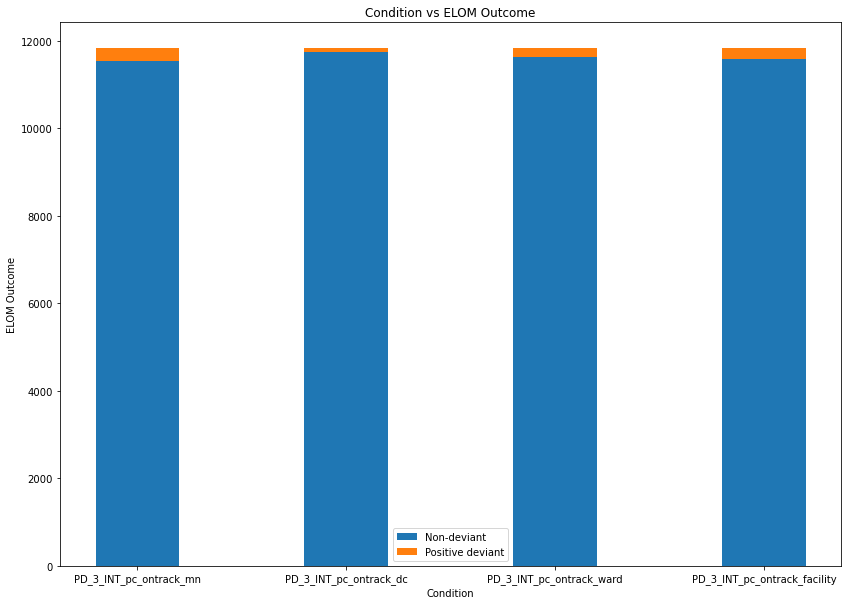

In [79]:
plt.figure(figsize=(14,10))
w = 0.4
x = ['PD_3_INT_pc_ontrack_mn','PD_3_INT_pc_ontrack_dc','PD_3_INT_pc_ontrack_ward','PD_3_INT_pc_ontrack_facility']
Non_deviant = [ 11538,11740,11638,11586]
Positive_deviant =[291,89,191,243]

bar1 = np.arange(len(x))
plt.bar(x,Non_deviant,w,label ='Non-deviant')
plt.bar(x,Positive_deviant,w, bottom = Non_deviant, label = 'Positive deviant')

plt.xlabel('Condition')
plt.ylabel('ELOM Outcome')
plt.title('Condition vs ELOM Outcome')
plt.legend()
plt.show()

In [55]:
On_track.head()

,PD_3_INT_pc_ontrack_mn,PD_3_INT_pc_ontrack_dc,PD_3_INT_pc_ontrack_ward,PD_3_INT_pc_ontrack_facility
0,Non-deviant,Non-deviant,Non-deviant,Non-deviant
1,Non-deviant,Non-deviant,Non-deviant,Non-deviant
2,Non-deviant,Non-deviant,Non-deviant,Non-deviant
3,Non-deviant,Non-deviant,Non-deviant,Non-deviant
4,Non-deviant,Non-deviant,Non-deviant,Non-deviant


In [56]:
#cross tabulation between municipality & district
ctab = pd.crosstab(index=On_track['PD_3_INT_pc_ontrack_mn'], columns=On_track['PD_3_INT_pc_ontrack_dc'])
ctab

PD_3_INT_pc_ontrack_dc,Non-deviant,Positive deviant
PD_3_INT_pc_ontrack_mn,,
Non-deviant,11449,89
Positive deviant,291,0


In [57]:
#cross table between municipality & ward
ctab1 = pd.crosstab(index=On_track['PD_3_INT_pc_ontrack_mn'], columns=On_track['PD_3_INT_pc_ontrack_ward'])
ctab1

PD_3_INT_pc_ontrack_ward,Non-deviant,Positive deviant
PD_3_INT_pc_ontrack_mn,,
Non-deviant,11355,183
Positive deviant,283,8


In [58]:
#Cross tab between municipality & facility
ctab2 = pd.crosstab(index=On_track['PD_3_INT_pc_ontrack_mn'], columns=On_track['PD_3_INT_pc_ontrack_facility'])
ctab2

PD_3_INT_pc_ontrack_facility,Non-deviant,Positive deviant
PD_3_INT_pc_ontrack_mn,,
Non-deviant,11295,243
Positive deviant,291,0


In [59]:
#pd.crosstab(df.index,df.preferences)

In [60]:
#Performing Chi-square tests to check the association between municipality and facilities
ctab, chitest, expected = rp.crosstab(On_track['PD_3_INT_pc_ontrack_mn'],On_track['PD_3_INT_pc_ontrack_facility'],
                                     margins = False, test = "chi-square", expected_freqs = True)

print(ctab)
print(chitest)
print(expected)

                             PD_3_INT_pc_ontrack_facility                 
PD_3_INT_pc_ontrack_facility                  Non-deviant Positive deviant
PD_3_INT_pc_ontrack_mn                                                    
Non-deviant                                         11295              243
Positive deviant                                      291                0
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    6.2572
1                    p-value =    0.0124
2               Cramer's phi =    0.0230
                             PD_3_INT_pc_ontrack_facility                 
PD_3_INT_pc_ontrack_facility                  Non-deviant Positive deviant
PD_3_INT_pc_ontrack_mn                                                    
Non-deviant                                  11300.977936       237.022064
Positive deviant                               285.022064         5.977936


### Interpretation of the Cramer's V statistic
> Greater than **0.25** = Very strong <br>
>Greater than **0.16** = strong <br>
>Greater than **0.10** = Moderate <br>
>Greater than **0.05** = Weak <br>
>Greater than **0** = No or very weak

In [61]:
#ctab.plot.barh(figsize=(6,8), xlabel='count')


In [62]:
On_track['PD_3_INT_pc_ontrack_mnx'] = On_track['PD_3_INT_pc_ontrack_mn'].apply(my_recode)
On_track['PD_3_INT_pc_ontrack_dcx'] = On_track['PD_3_INT_pc_ontrack_dc'].apply(my_recode)
On_track['PD_3_INT_pc_ontrack_wardx'] = On_track['PD_3_INT_pc_ontrack_ward'].apply(my_recode)
On_track['PD_3_INT_pc_ontrack_facilityx'] = On_track['PD_3_INT_pc_ontrack_facility'].apply(my_recode)

C:\Users\karas\AppData\Local\Temp/ipykernel_25180/383456313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  On_track['PD_3_INT_pc_ontrack_mnx'] = On_track['PD_3_INT_pc_ontrack_mn'].apply(my_recode)
C:\Users\karas\AppData\Local\Temp/ipykernel_25180/383456313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  On_track['PD_3_INT_pc_ontrack_dcx'] = On_track['PD_3_INT_pc_ontrack_dc'].apply(my_recode)
C:\Users\karas\AppData\Local\Temp/ipykernel_25180/383456313.py:3: SettingWithCopyWarning: 
A value is trying

In [63]:
Track = On_track.drop(['PD_3_INT_pc_ontrack_mn','PD_3_INT_pc_ontrack_dc','PD_3_INT_pc_ontrack_ward','PD_3_INT_pc_ontrack_facility'],axis =1)
Track.head()

,PD_3_INT_pc_ontrack_mnx,PD_3_INT_pc_ontrack_dcx,PD_3_INT_pc_ontrack_wardx,PD_3_INT_pc_ontrack_facilityx
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [64]:
Track['PD_3_INT_pc_ontrack_mnx']= pd.factorize(Track['PD_3_INT_pc_ontrack_mnx'])[0]
Track['PD_3_INT_pc_ontrack_dcx']= pd.factorize(Track['PD_3_INT_pc_ontrack_dcx'])[0]
Track['PD_3_INT_pc_ontrack_wardx']= pd.factorize(Track['PD_3_INT_pc_ontrack_wardx'])[0]
Track['PD_3_INT_pc_ontrack_facilityx']= pd.factorize(Track['PD_3_INT_pc_ontrack_facilityx'])[0]

In [66]:
#df.pivot(index='channel', columns='ab', values='booked').plot(kind='bar')

### Assess municipality 